## Practical part: Density estimation

In [1]:
import numpy as np
from numpy import pi, exp
import matplotlib.pyplot as plt

### Load iris dataset

In [2]:
# sepal_length,sepal_width,petal_length,petal_width,species
iris_data = np.loadtxt("iris.txt")
iris_features = iris_data[:, 0:4] 
species = iris_data[:,-1]

## Question 1
Implement a diagonal Gaussian parametric density estimator. It will
have to work for data of arbitrary dimension d. As seen in the labs, it
should have a train() method to learn the parameters and a method
predict() which calculates the log density.

In [62]:
class Gaussian:
    
    def __init__(self):
        self.d = 0
        self.mu = 0
        # sigma is the covariance matrix
        # not the square of the variance
        self.sigma = 1
        
    def reshape_inputs(self, X):
        """Add a dummy dimension to Xif X have 1 dimension"""
        try:
            n, d = X.shape
        except ValueError:
            n = X.shape[0]
            X = X.reshape(n, 1)
        return X
    
    def inv(self, a): return np.linalg.inv(a)
    
    def det(self, a): return np.linalg.det(a)
    
    def gaussian(self, x):
        Z = (2 * pi * self.sigma)**(1 / 2)
        return exp(-(x-self.mu)**2/self.sigma) / Z
    
    def multi_gaussian(self, x):
        Z = (2 * pi)**(self.d / 2) * self.det(self.sigma)**(1 / 2)
        return exp(-0.5 * (x - self.mu)**2 * self.inv(self.sigma) * (x - self.mu).T**2) / Z
        
    def train(self, X):
        """Fit a diagonal parametric gaussian using log-likelihood
        
        Args:
            X: (array or ndarray) inputs of size <n x 1> or <n x d> 
        
        return: (mu, sigma)
        
        NOTE: the covariance matrix is multiply by an identity
        matrix to ensure that non diagonal element are equal to ]
        zero
        """
        X = self.reshape_inputs(X)
        n, self.d = X.shape
        
        self.mu = np.sum(X, axis=0).reshape(1, self.d)/n
        self.sigma = np.dot(X.T-self.mu.T, X-self.mu)/(n-1) * np.eye(self.d)
        
        return self.mu, self.sigma
    
    def predict(self, x):
        
        n = x.shape[0]
        
        if self.d == 1:
            return self.gaussian(x).reshape(n,)
        else:
            return self.multi_gaussian(x)

## Question 3
1D densities: From the Iris dataset examples, choose a subset corresponding
to one of the classes (of your choice), and one of the characteristic
features, so that we will be in dimension $d$ = 1 and produce a
single graph (using the plot function) including:

In [65]:
class OneDimDensities(Gaussian):
    
    def __init__(self, inputs, model):
        
        self.inputs = inputs
        self.n = len(inputs)
        self.model = model
        self.mu, self.sigma = model.train(inputs)
        
        # plot parameters
        self.n_bins = 1000
        self.x_min = np.min(inputs)-1
        self.x_max = np.max(inputs)+1
        self.alpha=0.75
    
    def add_data_points(self):
        plt.scatter(self.inputs, np.zeros(self.n), color='red')
    
    def add_gaussian_density(self):
        x = np.linspace(self.x_min, self.x_max, self.n_bins)
        prob = self.model.predict(x)
        plt.plot(x, prob, color='black', alpha=self.alpha)
    
    def run(self):
        plt.figure()
        self.add_data_points()
        self.add_gaussian_density()
        plt.show()

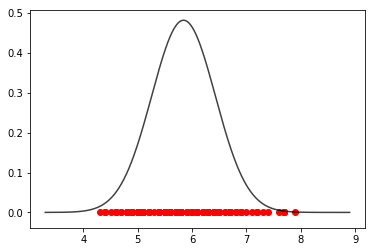

In [66]:
gaussian = Gaussian() 
sepal_length = iris_features[:,0]
plot = OneDimDensities(sepal_length, gaussian)
plot.run()